# Visualizing Data

Cool, you've learned how to get the data into how you want it, but it's all still just numbers.  When telling people about what you've found, it is beneficial to put it into a visual representation.  It is also good to look at visual representations of the data to help you figure out how what to do, or even help understand what you have!

This section is all about utilizing the built-in methods of Pandas for visualization.  

And then a little Boket, which is a package built on matplotlib to help you visualize.  It's huge, so we only touch the basics and give you some places to go to play around.

## What is Matplotlib

In [3]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline

First, you'll need the [documentation](https://matplotlib.org/contents.html).

Now, Matplotlib is _the_ plotting library in Python.  It was designed to work and provide an API like MATLAB, but be as usable as Python.  Everything that plots in python is built from the foundation that is Matplotlib.  You can do just about anything using only Matplotlib, but because it is so general, it is often difficult to use.  Sometimes, you just want to type `plot` and make things work.  

Pandas helps with that.  It should be said that plotting with Pandas is mostly for exploration, and not presentation style graphics.  There are many graphics packages that can make some beautiful plots.  I personally prefer plot.ly, but its API is a bit in depth.  Maybe we'll go into if we have enough time at the end.  

## Simple plot types

As mentioned previously, the built in plotting of Pandas is normally used for exploratory analysis.  Often times, finding trends or actionable insight comes from asking broad scope questions of a large data set to look for clear behavior that can't be seen from "looking at the numbers."

Let's start by taking a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html), as always.  We'll also port in a few datasets from previous lessons to play around with. 

In [4]:
# Get JSON data from coinmarketcap.com's API (top 50 cryptocurrencies by market cap)
req = requests.get('https://api.coinmarketcap.com/v1/ticker/?limit=50')
res = req.text
# note that `read_json` wants a text source of data
cryptos = pd.read_json(res)
cryptos.head()
# cryptos.tail()      # Show last 5 rows
# cryptos.sample(n=5) # Show a random sample of n rows
# cryptos.describe()  # Show statistical information about DataFrame
# cryptos.info()      # Show 

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,1359610000,16379825,bitcoin,1496941154,45018147232,Bitcoin,0.49,-2.08,15.50,1.000000,2748.390000,1,BTC,16379825
1,434996000,92312998,ethereum,1496941165,23762196421,Ethereum,0.04,-1.41,16.77,0.094082,257.409000,2,ETH,92312998
2,121425000,38621693933,ripple,1496941143,11207513497,Ripple,0.31,-0.19,-3.11,0.000106,0.290187,3,XRP,99994661895
3,12419300,8999999999,nem,1496941162,1930365000,NEM,-0.01,-4.65,-2.00,0.000078,0.214485,4,XEM,8999999999
4,63604000,92408187,ethereum-classic,1496941176,1604806780,Ethereum Classic,0.11,-3.04,1.96,0.006347,17.366500,5,ETC,92408187


In [11]:
# Reading from CSV file.
#   breaches.csv is all of the breaches in the haveibeenpwnded.com database
#   This was retrieved from their API, and turned into a CSV (using Pandas of course :) )
breaches = pd.read_csv('breaches.csv', parse_dates=['BreachDate', 'AddedDate', 'ModifiedDate'])
breaches.head()

,Unnamed: 0,AddedDate,BreachDate,DataClasses,Description,Domain,IsActive,IsFabricated,IsRetired,IsSensitive,IsSpamList,IsVerified,LogoType,ModifiedDate,Name,PwnCount,Title
0,0,2015-10-26 23:35:45,2015-03-01,"['Email addresses', 'IP addresses', 'Names', '...","In approximately March 2015, the free web host...",000webhost.com,True,False,False,False,False,True,png,2015-10-26 23:35:45,000webhost,13545468,000webhost
1,1,2016-10-08 07:46:05,2012-01-01,"['Email addresses', 'Passwords']","In approximately 2012, it's alleged that the C...",126.com,True,False,False,False,False,False,svg,2016-10-08 07:46:05,126,6414191,126
2,2,2016-07-08 01:55:03,2016-04-19,"['Device information', 'Email addresses', 'IP ...","In April 2016, customer data obtained from the...",17app.co,True,False,False,False,False,True,svg,2016-07-08 01:55:03,17Media,4009640,17
3,3,2016-03-06 11:07:41,2014-11-25,"['Dates of birth', 'Email addresses', 'IP addr...","In November 2014, the acne website <a href=""ht...",acne.org,True,False,False,False,False,True,svg,2016-03-06 11:07:41,AcneOrg,432943,Acne.org
4,4,2013-12-04 00:00:00,2013-10-04,"['Email addresses', 'Password hints', 'Passwor...","In October 2013, 153 million Adobe accounts we...",adobe.com,True,False,False,False,False,True,svg,2013-12-04 00:00:00,Adobe,152445165,Adobe


In [5]:
cars = pd.read_csv('../Day2_old/Day 2 - For Corey/data/mtcars.csv')
cars.head()

,Model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda X4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


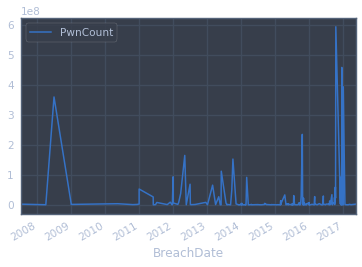

In [21]:
breaches.plot(x='BreachDate', y='PwnCount')
# breaches.BreachDate.values[0]

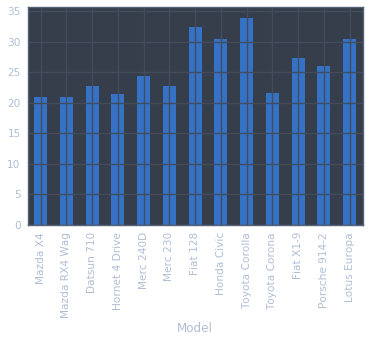

In [7]:
cars[cars.mpg > 20].set_index('Model').mpg.plot(kind='bar')

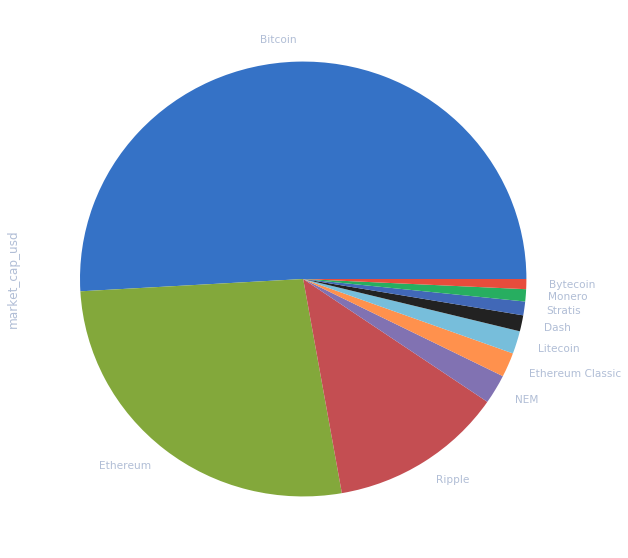

In [10]:
cryptos[:10].set_index('name').market_cap_usd.plot(kind='pie', figsize=(10,10))

## Plotting multiple columns

You can pass an array of columns to y= and get a comparison chart.  If the scales are separate, then you need to tell Pandas which column should go to a secondary y-axis.

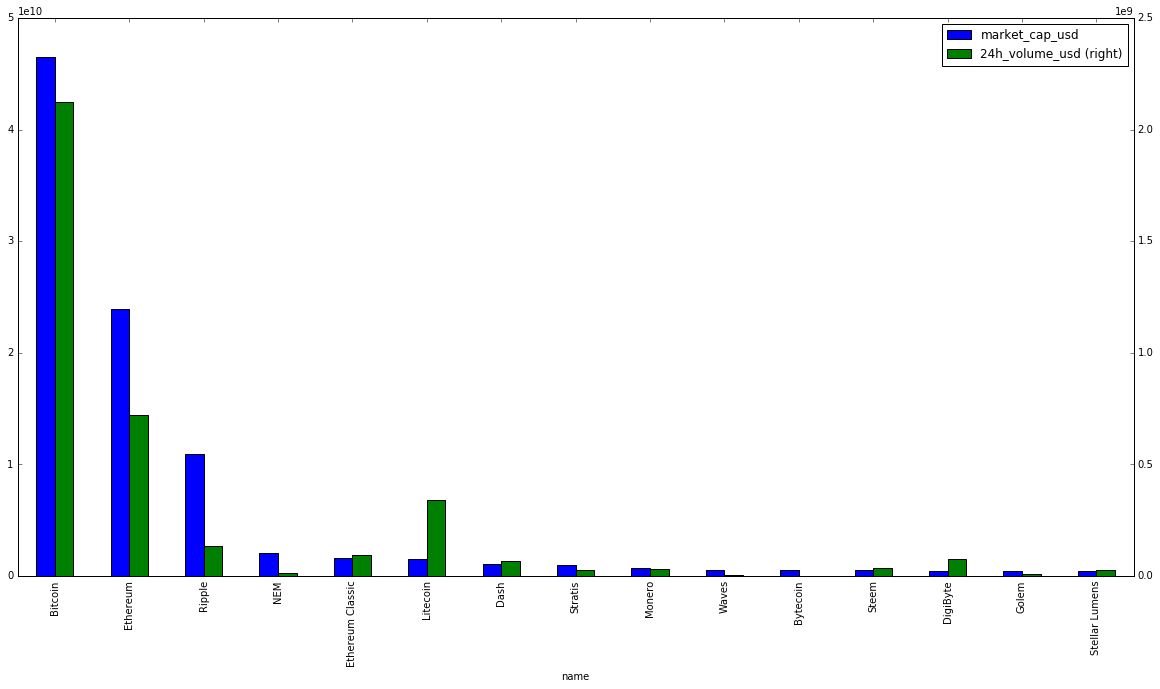

In [10]:
cryptos[:15].set_index('name').plot(y=['market_cap_usd', '24h_volume_usd'], kind='bar', secondary_y='24h_volume_usd', figsize=(20,10))

## Chaining Actions

A large part of visualizing data is getting it into the correct form.  By using the techniques from the previous section, we can incrementally chain together commands to further and further shape the data to what we want.

Let's do it step by step, and then it all in a single line.

In [11]:
groups = cars.groupby('cyl')
groups

In [12]:
groups_mean = groups.mean()
groups_mean

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,
4,27.190000,103.550000,80.000000,4.067000,2.236300,19.191000,0.900000,0.700000,4.100000,1.500000
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


In [13]:
grouped_mpg = groups_mean.mpg
grouped_mpg

cyl
4    27.190000
6    19.742857
8    15.100000
Name: mpg, dtype: float64

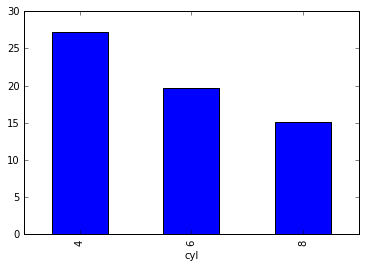

In [9]:
grouped_mpg.plot(kind='bar')

THE ONE LINER

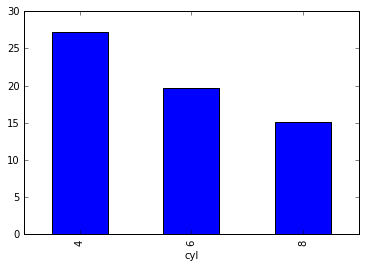

In [14]:
cars.groupby('cyl').mean().mpg.plot(kind='bar')

This allows you to quickly explore the data, and iteratively change it to get things the way you want them, finalizing on a plot that you like. 

## R-like data frame plots

Some people like the robustness of R dataframe plotting.  It will give a quick look at all correlations among columns in a dataframe.  You can do the same with a scatter_matrix in Pandas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1171a67f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119f7bcc0>]], dtype=object)

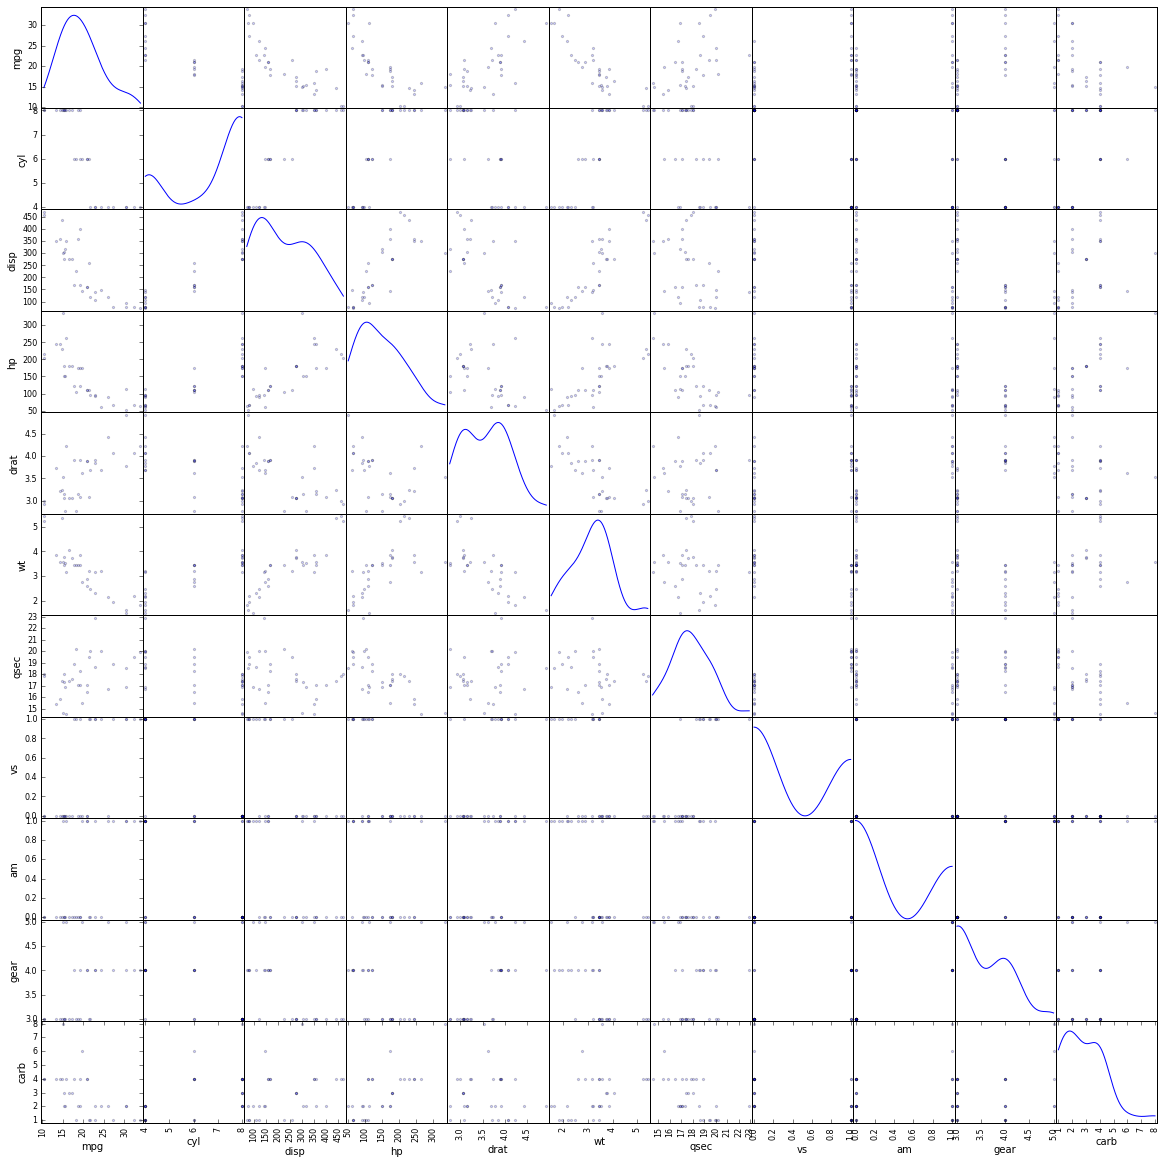

In [8]:
pd.scatter_matrix(cars, alpha=0.2, figsize=(20, 20), diagonal='kde')

## Sprucing up with Boquet

You guessed it: [Documentation]()

In [94]:
!pip3 install bokeh

    100% |████████████████████████████████| 7.0MB 197kB/s eta 0:00:01
  Running setup.py install for bokeh ... done


In [15]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.charts import Bar, Scatter, Histogram, BoxPlot
output_notebook()

Loading BokehJS ...

In [16]:
p = Scatter(cars, x='mpg', y='hp', color='cyl', legend='top_right')

In [17]:
show(p)

In [18]:
p = Histogram(cars, values='mpg', color='cyl', legend='top_right')
show(p)

In [19]:
p = BoxPlot(cars, values='mpg', label='cyl', color='cyl',
            title="MPG Summary (grouped and shaded by CYL)",
            legend="top_right")

show(p)

## Exercises